<a href="https://colab.research.google.com/github/narender5162/DSPROJECT/blob/main/DSPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
!git clone https://github.com/narender5162/DSPROJECT.git

fatal: destination path 'DSPROJECT' already exists and is not an empty directory.


# Importing libraries

In [184]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px


In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading data set

In [186]:
import pandas as pd
# Correct file path
file_path = '/content/drive/MyDrive/data set destinations .csv'
# Load the dataset
data = pd.read_csv(file_path, encoding='latin1')




## Displaying the first few rows

In [187]:
# Display the first few rows
print(data.head())

  Destination    Region Country Category   Latitude  Longitude  \
0        Rome     Lazio   Italy     City  41.902782  12.496366   
1    Florence   Tuscany   Italy     City  43.769581  11.255772   
2      Venice    Veneto   Italy     City  45.435559  12.336196   
3       Milan  Lombardy   Italy     City  45.464643   9.188540   
4      Naples  Campania   Italy     City  40.851330  14.254720   

  Approximate Annual Tourists Currency Majority Religion  \
0                  14 million     Euro    Roman Catholic   
1                  10 million     Euro    Roman Catholic   
2                  10 million     Euro    Roman Catholic   
3                   7 million     Euro    Roman Catholic   
4                   5 million     Euro    Roman Catholic   

                   Famous Foods Language  \
0          Pizza, Pasta, Gelato  Italian   
1          Pizza, Pasta, Gelato  Italian   
2          Pizza, Pasta, Gelato  Italian   
3  Risotto, Ossobuco, Panettone  Italian   
4         Pizza, Pasta

## Displaying the last few rows

In [188]:
# Display the last few rows
print(data.tail())

           Destination          Region Country        Category   Latitude  \
204           Kopaonik  Central Serbia  Serbia  Mountain Range  43.575278   
205  Novi Sad Fortress        Novi Sad  Serbia        Fortress  45.263333   
206   Sremski Karlovci       Vojvodina  Serbia            Town  45.263333   
207           Subotica     North Backa  Serbia            City  46.083333   
208     Vrnja?ka Banja           Ra?ka  Serbia        Spa Town  43.519722   

     Longitude Approximate Annual Tourists             Currency  \
204  20.760556                     100,000  Serbian dinar (RSD)   
205  19.846667                      50,000  Serbian dinar (RSD)   
206  19.846667                      25,000  Serbian dinar (RSD)   
207  18.966667                      20,000  Serbian dinar (RSD)   
208  20.851389                      10,000  Serbian dinar (RSD)   

    Majority Religion                Famous Foods            Language  \
204  Serbian Orthodox  ?evapi, Pljeskavica, Sarma            

In [189]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination                  209 non-null    object 
 1   Region                       209 non-null    object 
 2   Country                      209 non-null    object 
 3   Category                     209 non-null    object 
 4   Latitude                     209 non-null    float64
 5   Longitude                    209 non-null    float64
 6   Approximate Annual Tourists  209 non-null    object 
 7   Currency                     209 non-null    object 
 8   Majority Religion            209 non-null    object 
 9   Famous Foods                 209 non-null    object 
 10  Language                     209 non-null    object 
 11  Best Time to Visit           209 non-null    object 
 12  Cost of Living               209 non-null    object 
 13  Safety              

### Data Dleaning

In [190]:
# Display the column names to identify unwanted columns
data.columns



Index(['Destination', 'Region', 'Country', 'Category', 'Latitude', 'Longitude',
       'Approximate Annual Tourists', 'Currency', 'Majority Religion',
       'Famous Foods', 'Language', 'Best Time to Visit', 'Cost of Living',
       'Safety', 'Cultural Significance', 'Description'],
      dtype='object')

### Checking for missing data

In [191]:
 #Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values


,0
Destination,0
Region,0
Country,0
Category,0
Latitude,0
Longitude,0
Approximate Annual Tourists,0
Currency,0
Majority Religion,0
Famous Foods,0


### droping unwnated columns

In [192]:
# Dropping non-essential columns for this analysis
columns_to_drop = ['Description']  # Drop this due to missing values and qualitative nature
cleaned_data = data.drop(columns=columns_to_drop)




###  checking cleaned data columns

In [193]:
 #Verify the remaining columns
cleaned_data.columns

Index(['Destination', 'Region', 'Country', 'Category', 'Latitude', 'Longitude',
       'Approximate Annual Tourists', 'Currency', 'Majority Religion',
       'Famous Foods', 'Language', 'Best Time to Visit', 'Cost of Living',
       'Safety', 'Cultural Significance'],
      dtype='object')

#visuvalization through graphs


### after cleaning and converting data in numeric values

In [194]:
# Summary statistics for numeric columns
numeric_summary = cleaned_data.describe()




In [195]:
# Unique values in categorical columns
categorical_summary = {col: cleaned_data[col].nunique() for col in cleaned_data.columns if cleaned_data[col].dtype == 'object'}



In [196]:
# Display the summaries
numeric_summary, categorical_summary

(         Latitude   Longitude
 count  209.000000  209.000000
 mean    48.381503   12.397526
 std      8.203389   20.545257
 min     32.652843  -22.189722
 25%     43.257158    4.886067
 50%     47.557778    9.741326
 75%     53.480958   18.955689
 max     69.649328  158.624312,
 {'Destination': 208,
  'Region': 138,
  'Country': 21,
  'Category': 49,
  'Approximate Annual Tourists': 35,
  'Currency': 12,
  'Majority Religion': 10,
  'Famous Foods': 66,
  'Language': 27,
  'Best Time to Visit': 14,
  'Cost of Living': 6,
  'Safety': 9,
  'Cultural Significance': 208})

### top most 10 visited Destinations


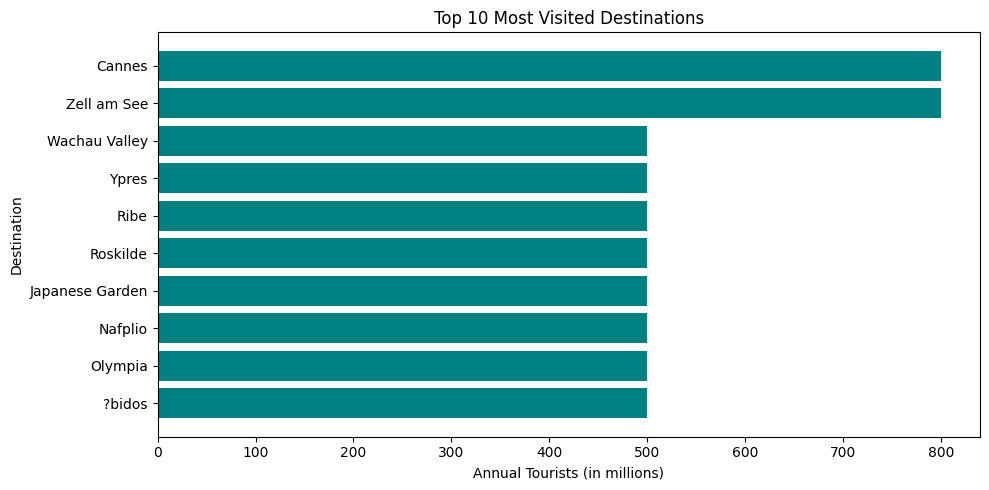

In [197]:
# Ensure the column is clean and numeric
cleaned_data['Approximate Annual Tourists'] = cleaned_data['Approximate Annual Tourists'].astype(str)
cleaned_data['Approximate Annual Tourists'] = (
    cleaned_data['Approximate Annual Tourists']
    .str.extract(r'(\d+\.?\d*)')[0]
    .astype(float)
)

# Drop rows with NaN values in the column
cleaned_data = cleaned_data.dropna(subset=['Approximate Annual Tourists'])

# Top 10 Most Visited Destinations
top_destinations = cleaned_data.nlargest(10, 'Approximate Annual Tourists')

plt.figure(figsize=(10, 5))
plt.barh(top_destinations['Destination'], top_destinations['Approximate Annual Tourists'], color='teal')
plt.xlabel('Annual Tourists (in millions)')
plt.ylabel('Destination')
plt.title('Top 10 Most Visited Destinations')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




### top most 10 visited countries

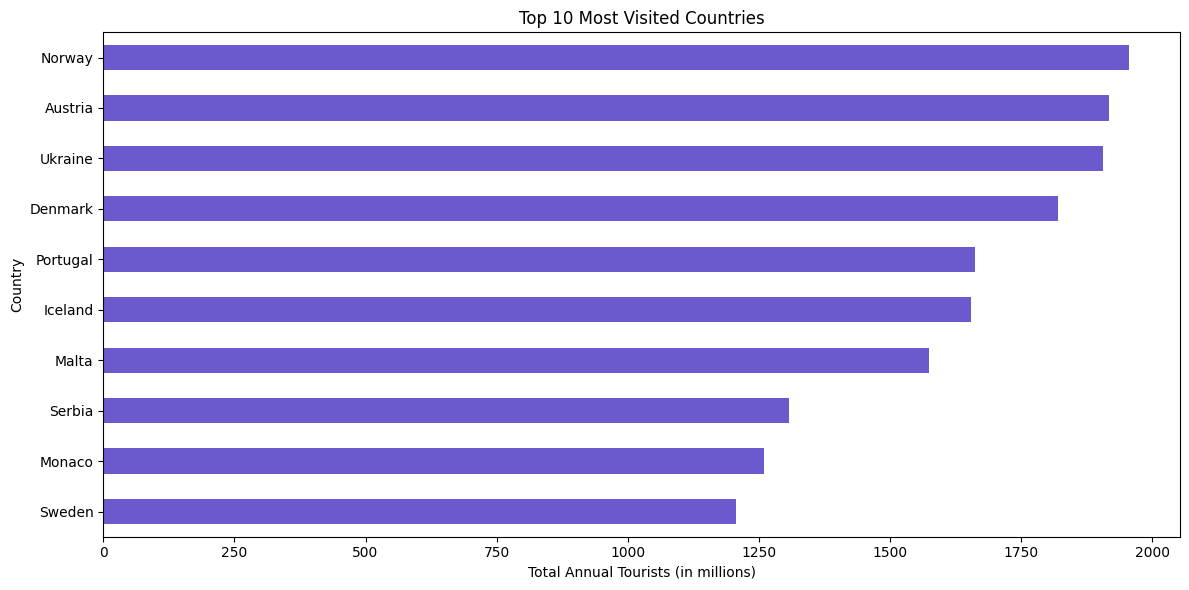

In [198]:
# Top 10 Most Visited Countries
country_tourists = cleaned_data.groupby('Country')['Approximate Annual Tourists'].sum()
top_countries = country_tourists.nlargest(10)

plt.figure(figsize=(12, 6))
top_countries.sort_values().plot(kind='barh', color='slateblue')
plt.xlabel('Total Annual Tourists (in millions)')
plt.ylabel('Country')
plt.title('Top 10 Most Visited Countries')
plt.tight_layout()
plt.show()

### Country distribution visuvalisation

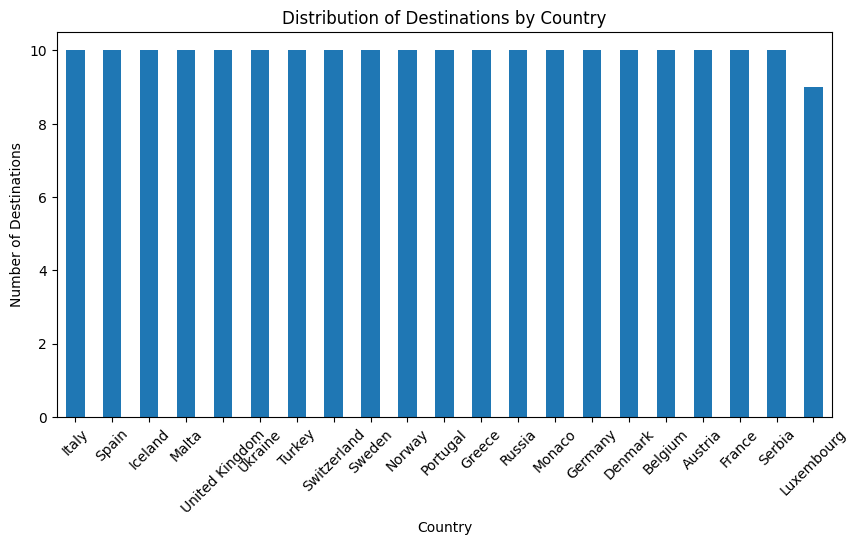

In [199]:
#Country Distribution Visualization
country_distribution = cleaned_data['Country'].value_counts()

plt.figure(figsize=(10, 5))
country_distribution.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Destinations')
plt.title('Distribution of Destinations by Country')
plt.xticks(rotation=45)
plt.show()




### Cost of living distribution by country

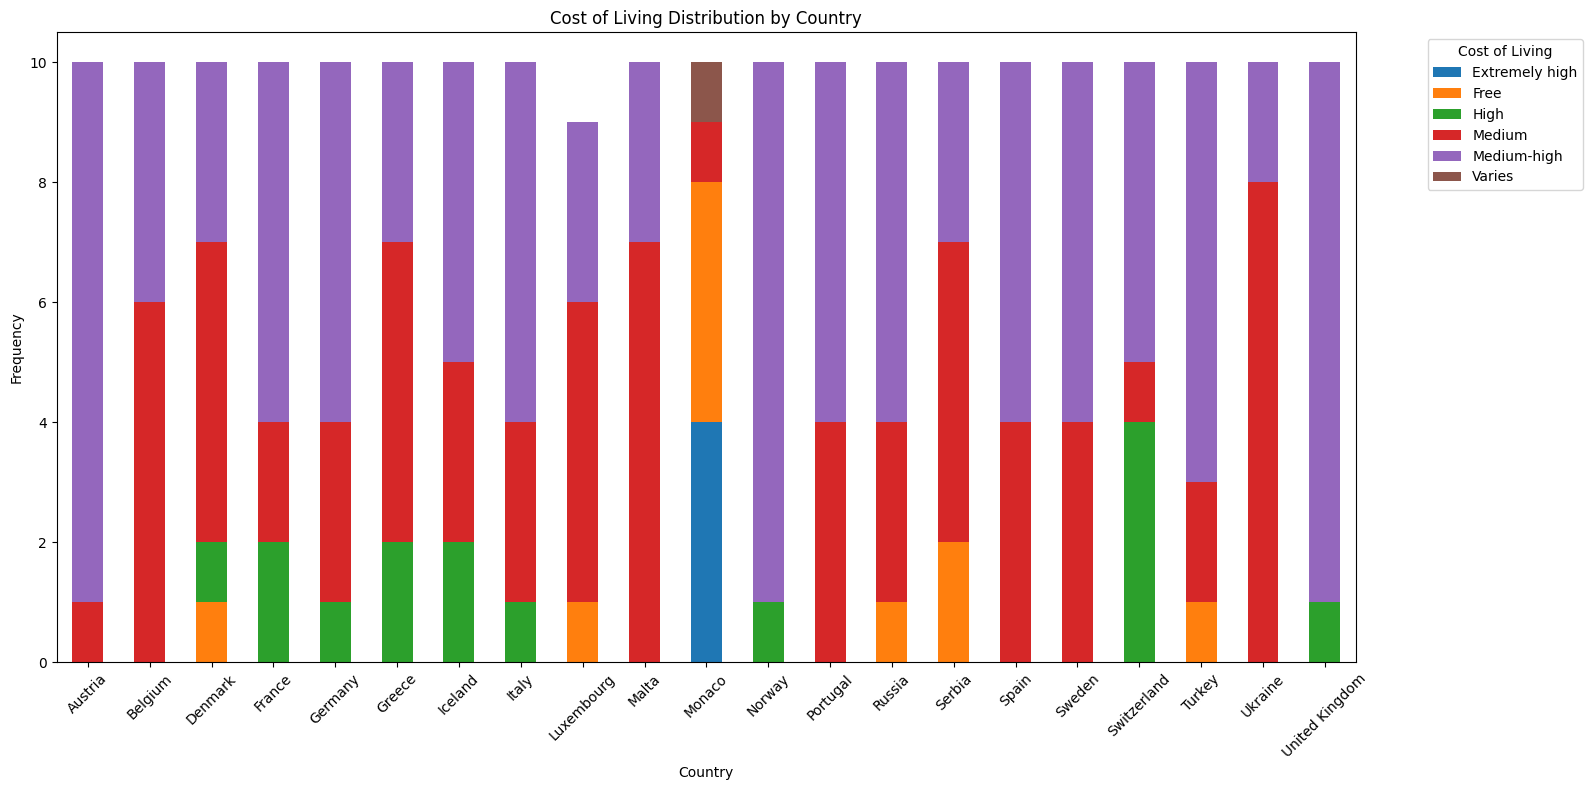

In [200]:
# Cost of Living Distribution by Country
cost_living_country = cleaned_data.groupby('Country')['Cost of Living'].value_counts().unstack()

cost_living_country.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Cost of Living Distribution by Country')
plt.xticks(rotation=45)
plt.legend(title='Cost of Living', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### famous food distribution by country

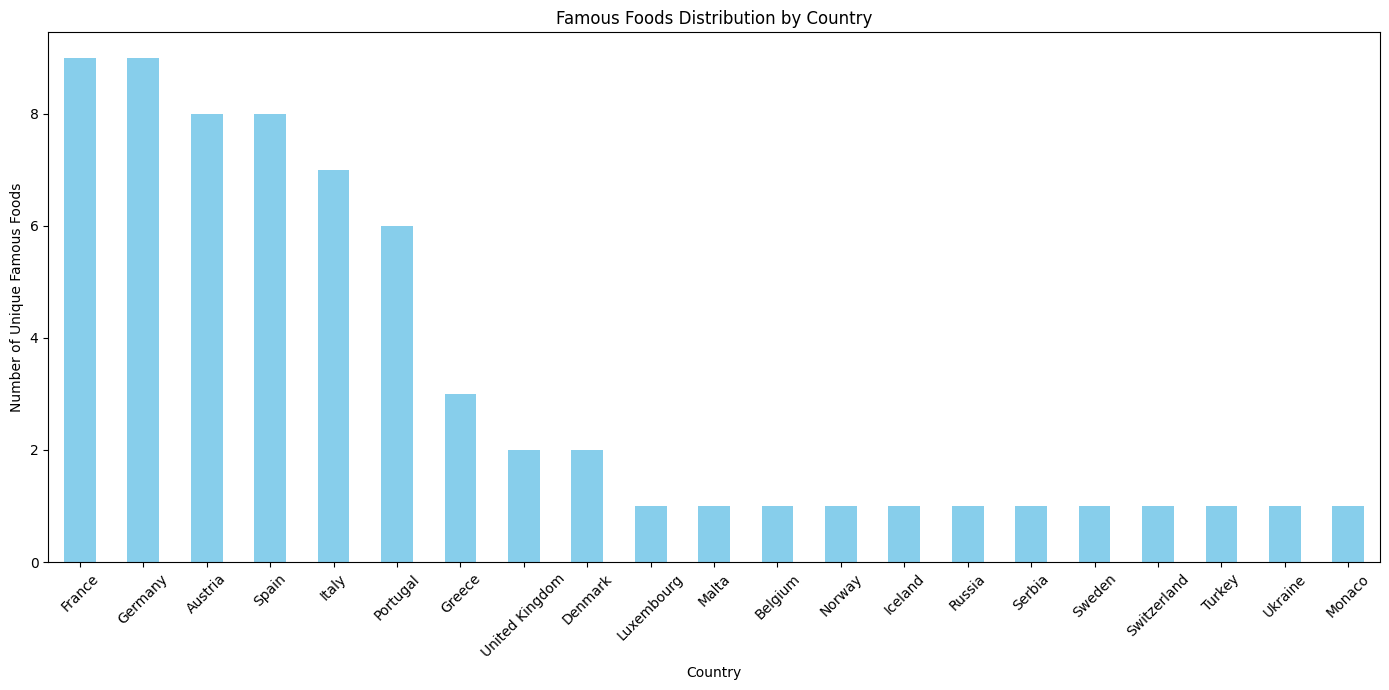

In [201]:
# the number of unique famous foods by country
famous_food_count = cleaned_data.groupby('Country')['Famous Foods'].nunique()

# Visualization: Bar chart for famous foods distribution by country
plt.figure(figsize=(14, 7))
famous_food_count.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Unique Famous Foods')
plt.title('Famous Foods Distribution by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Majority language distribution

<ipython-input-202-f11dcde9ace2>:16: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


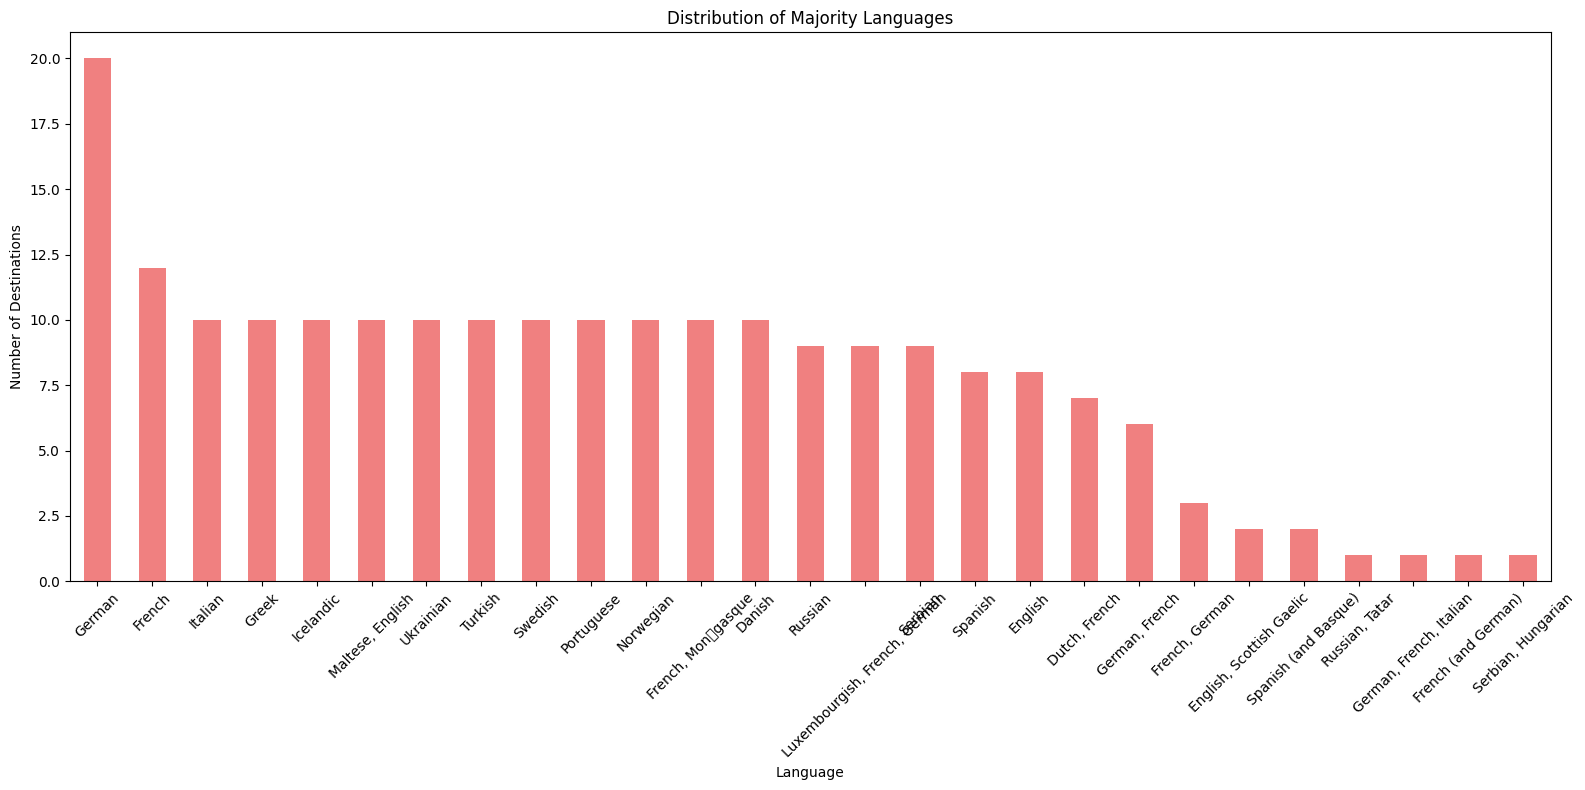

In [202]:
# Majority Language Distribution
language_distribution = cleaned_data['Language'].value_counts()
cleaned_data['Language'] = (
    cleaned_data['Language']
    .str.normalize('NFKD')
    .str.encode('ascii', errors='ignore')
    .str.decode('utf-8')
)

plt.figure(figsize=(16, 8))
language_distribution.plot(kind='bar', color='lightcoral')
plt.xlabel('Language')
plt.ylabel('Number of Destinations')
plt.title('Distribution of Majority Languages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Distribution of  Best time to vist

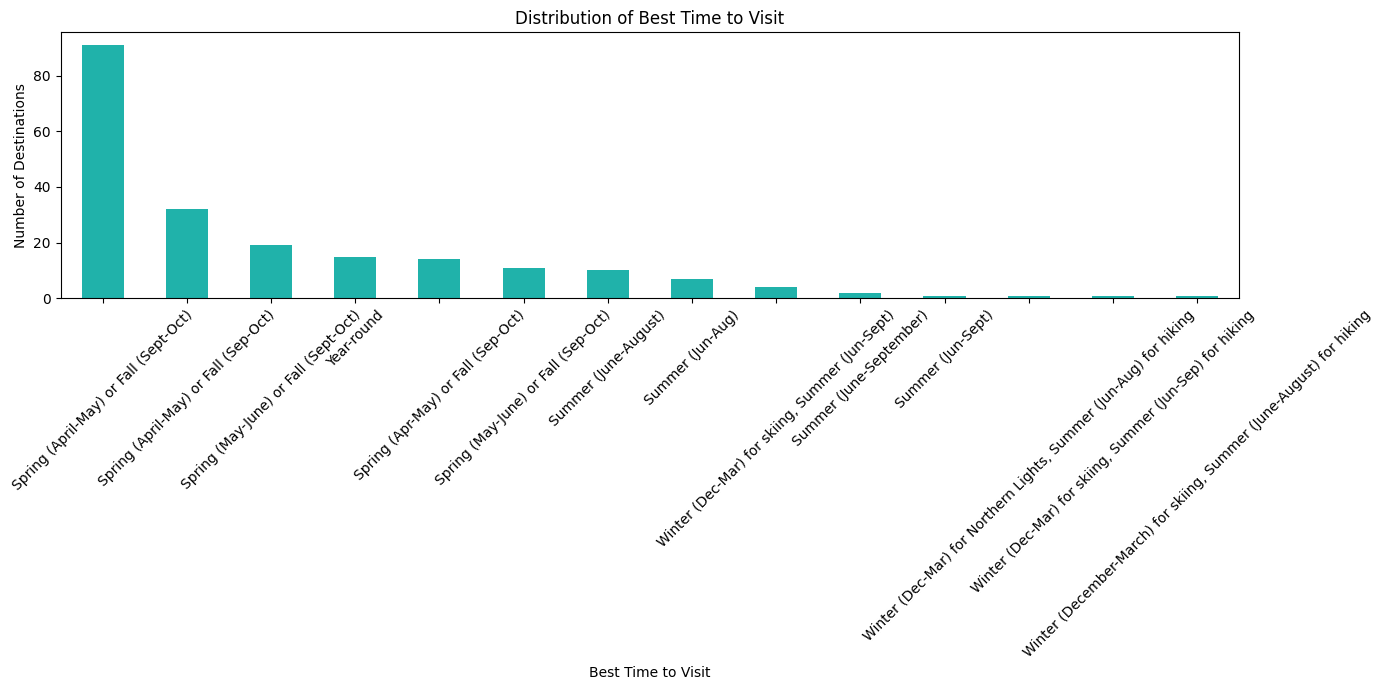

In [203]:
# Best Time to Visit Distribution
best_time_distribution = cleaned_data['Best Time to Visit'].value_counts()

plt.figure(figsize=(14, 7))
best_time_distribution.plot(kind='bar', color='lightseagreen')
plt.xlabel('Best Time to Visit')
plt.ylabel('Number of Destinations')
plt.title('Distribution of Best Time to Visit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Cost of living distribution

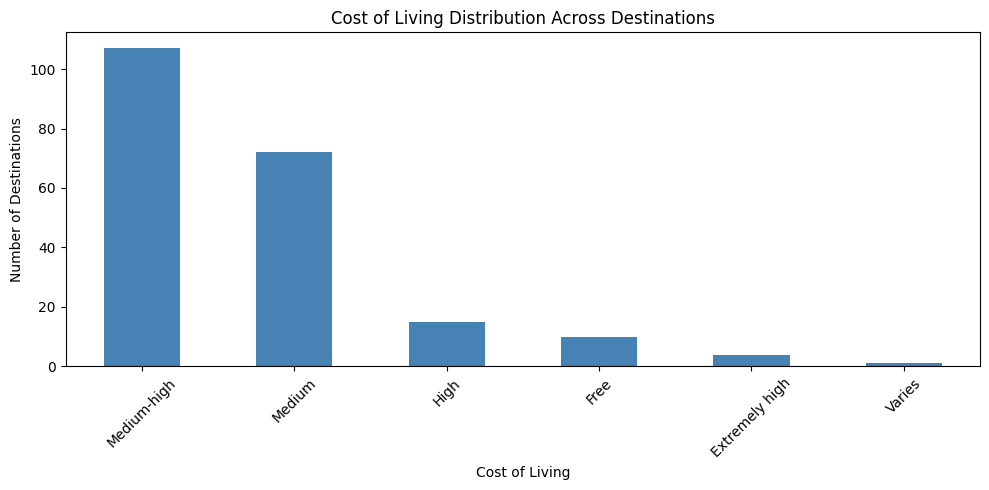

In [204]:
# Cost of Living Distribution
cost_of_living_distribution = cleaned_data['Cost of Living'].value_counts()

plt.figure(figsize=(10, 5))
cost_of_living_distribution.plot(kind='bar', color='steelblue')
plt.xlabel('Cost of Living')
plt.ylabel('Number of Destinations')
plt.title('Cost of Living Distribution Across Destinations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#From here clustering models used for data set


#importing libraries


In [205]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [206]:
!git clone https://github.com/narender5162/DSPROJECT.git

fatal: destination path 'DSPROJECT' already exists and is not an empty directory.


## Loading data set

In [207]:
#  file path
file_path = '/content/drive/MyDrive/data set destinations .csv'
# Load the dataset
data = pd.read_csv(file_path, encoding='latin1')
print("Dataset successfully loaded.")
try:

  #data as tourism data
    tourism_data = pd.read_csv(file_path, encoding='latin1')
    dataset_loaded = True
except Exception as e:
    dataset_loaded = False
    error_message = str(e)

dataset_loaded, tourism_data.head() if dataset_loaded else error_message


Dataset successfully loaded.


(True,
   Destination    Region Country Category   Latitude  Longitude  \
 0        Rome     Lazio   Italy     City  41.902782  12.496366   
 1    Florence   Tuscany   Italy     City  43.769581  11.255772   
 2      Venice    Veneto   Italy     City  45.435559  12.336196   
 3       Milan  Lombardy   Italy     City  45.464643   9.188540   
 4      Naples  Campania   Italy     City  40.851330  14.254720   
 
   Approximate Annual Tourists Currency Majority Religion  \
 0                  14 million     Euro    Roman Catholic   
 1                  10 million     Euro    Roman Catholic   
 2                  10 million     Euro    Roman Catholic   
 3                   7 million     Euro    Roman Catholic   
 4                   5 million     Euro    Roman Catholic   
 
                    Famous Foods Language  \
 0          Pizza, Pasta, Gelato  Italian   
 1          Pizza, Pasta, Gelato  Italian   
 2          Pizza, Pasta, Gelato  Italian   
 3  Risotto, Ossobuco, Panettone  Italian

In [208]:
#first few rows of data set
data.head()

,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Famous Foods,Language,Best Time to Visit,Cost of Living,Safety,Cultural Significance,Description
0,Rome,Lazio,Italy,City,41.902782,12.496366,14 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","The capital city, known for its historical lan...","A hub of ancient history and modern culture, w..."
1,Florence,Tuscany,Italy,City,43.769581,11.255772,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A Renaissance city famous for its art, archite...","Home to world-class museums, including the Uff..."
2,Venice,Veneto,Italy,City,45.435559,12.336196,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A unique city built on canals, known for its g...","An iconic city of water, renowned for romantic..."
3,Milan,Lombardy,Italy,City,45.464643,9.188540,7 million,Euro,Roman Catholic,"Risotto, Ossobuco, Panettone",Italian,Spring (April-May) or Fall (Sept-Oct),High,"Generally safe, but watch out for pickpockets","A fashion capital known for its shopping, muse...","A modern city with an ancient soul, featuring ..."
4,Naples,Campania,Italy,City,40.851330,14.254720,5 million,Euro,Roman Catholic,"Pizza, Pasta, Cannoli",Italian,Spring (April-May) or Fall (Sept-Oct),Medium,"Generally safe, but be aware of pickpockets","A vibrant city known for its delicious food, h...","Famous for pizza, Pompeii, and proximity to th..."


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination                  209 non-null    object 
 1   Region                       209 non-null    object 
 2   Country                      209 non-null    object 
 3   Category                     209 non-null    object 
 4   Latitude                     209 non-null    float64
 5   Longitude                    209 non-null    float64
 6   Approximate Annual Tourists  209 non-null    object 
 7   Currency                     209 non-null    object 
 8   Majority Religion            209 non-null    object 
 9   Famous Foods                 209 non-null    object 
 10  Language                     209 non-null    object 
 11  Best Time to Visit           209 non-null    object 
 12  Cost of Living               209 non-null    object 
 13  Safety              

In [210]:
# Summarize the dataset
data_summary = tourism_data.describe(include='all').transpose()

# Check for missing values in each column
missing_values = tourism_data.isnull().sum()

data_summary, missing_values


(                             count unique  \
 Destination                    209    208   
 Region                         209    138   
 Country                        209     21   
 Category                       209     49   
 Latitude                     209.0    NaN   
 Longitude                    209.0    NaN   
 Approximate Annual Tourists    209     35   
 Currency                       209     12   
 Majority Religion              209     10   
 Famous Foods                   209     66   
 Language                       209     27   
 Best Time to Visit             209     14   
 Cost of Living                 209      6   
 Safety                         209      9   
 Cultural Significance          209    208   
 Description                    159    159   
 
                                                                            top  \
 Destination                                                        Blue Lagoon   
 Region                                           

##Clean and Preprocess the Data


###Convert large  text in to numeric values by removing extra text and handling ranges


In [211]:
# Convert  text in to numeric values by removing extra text  by handlling ranges

def clean_tourist_values(value):
    """
    Simplify tourist number data:
    - For ranges like '35-40', calculate the average.
    - Remove words like 'million' or 'billion' and clean the number.
    - If it can't be converted, return NaN.

    Args:
    value (str): The raw value.

    Returns:
    float: A cleaned numeric value or NaN.
    """
    try:
        if '-' in value:
            low, high = map(float, value.split('-'))
            return (low + high) / 2
        return float(value)
    except ValueError:
        return np.nan

### cleaning the Approximate Annual Tourists and unwantedtext  to numeric values

In [212]:
# Apply cleaning to the column
data['Approximate Annual Tourists'] = (
    data['Approximate Annual Tourists']
    .str.replace(' million', '', regex=False)
    .str.replace(' billion', '', regex=False)
    .str.replace(',', '', regex=False)
    .apply(clean_tourist_values)
    * 1e6
)

###Converting textual cost categories into numeric and discription to unkown

In [213]:
# mapping to numeriv values
cost_mapping = {'Low': 1, 'Medium': 2, 'Medium-high': 3, 'High': 4}
data['Cost of Living'] = data['Cost of Living'].map(cost_mapping)
data['Description'] = data['Description'].fillna('Unknown')


###filling missing values in numeric columns with median and encoding language columns into numneric

In [214]:
# numeric columns, fill missing values with the median
numerical_columns = ['Approximate Annual Tourists', 'Cost of Living']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())
data['Language_Encoded'] = data['Language'].astype('category').cat.codes


#Loding the data after cleaning  and converted

In [215]:
print("\nCleaned Dataset Information:")
data.info()
print("\nSummary Statistics of Numeric Columns:")
print(data.describe())
print("\nFirst few rows of the cleaned dataset:")
print(data.head())



Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination                  209 non-null    object 
 1   Region                       209 non-null    object 
 2   Country                      209 non-null    object 
 3   Category                     209 non-null    object 
 4   Latitude                     209 non-null    float64
 5   Longitude                    209 non-null    float64
 6   Approximate Annual Tourists  209 non-null    float64
 7   Currency                     209 non-null    object 
 8   Majority Religion            209 non-null    object 
 9   Famous Foods                 209 non-null    object 
 10  Language                     209 non-null    object 
 11  Best Time to Visit           209 non-null    object 
 12  Cost of Living               209 non-null    flo

In [216]:
# Encode 'Best Time to Visit'
data['Best Time Encoded'] = data['Best Time to Visit'].astype('category').cat.codes

# Encode 'Famous Foods' (if meaningful as categorical data)
data['Famous Foods Encoded'] = data['Famous Foods'].astype('category').cat.codes


## features selection and scaling for clusteing models

In [217]:
from sklearn.preprocessing import StandardScaler
# Feature Selection and Scaling
#Features based on project goals
clustering_features = [
    'Approximate Annual Tourists',
    'Cost of Living',
    'Latitude',
    'Longitude',
    'Language_Encoded',
    'Best Time Encoded',
    'Famous Foods Encoded'
]
#checking missing values
print("\nChecking for missing values in clustering features:")
print(data[clustering_features].isnull().sum())

# Standardize the features and coverting scaleddata to data frame
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[clustering_features])
scaled_df = pd.DataFrame(data_scaled, columns=clustering_features)
print("\nSummary of Scaled Features:")
print(scaled_df.describe())



Checking for missing values in clustering features:
Approximate Annual Tourists    0
Cost of Living                 0
Latitude                       0
Longitude                      0
Language_Encoded               0
Best Time Encoded              0
Famous Foods Encoded           0
dtype: int64

Summary of Scaled Features:
       Approximate Annual Tourists  Cost of Living      Latitude  \
count                 2.090000e+02    2.090000e+02  2.090000e+02   
mean                  1.699863e-17    3.399726e-16 -1.699863e-17   
std                   1.002401e+00    1.002401e+00  1.002401e+00   
min                  -5.846219e-01   -1.243814e+00 -1.921940e+00   
25%                  -5.846163e-01   -1.243814e+00 -6.261617e-01   
50%                  -5.845827e-01    4.664303e-01 -1.006538e-01   
75%                  -2.414909e-02    4.664303e-01  6.231204e-01   
max                   3.899200e+00    2.176675e+00  2.598790e+00   

          Longitude  Language_Encoded  Best Time Encoded  Fam

# **K Means clustering model**

In [218]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Determine the Optimal Number of Clusters

# Compute the Within-Cluster Sum of Squares (WCSS) for different cluster counts
wcss = []
max_clusters = 10  # Test up to 10 clusters
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# # Applying  Elbow method

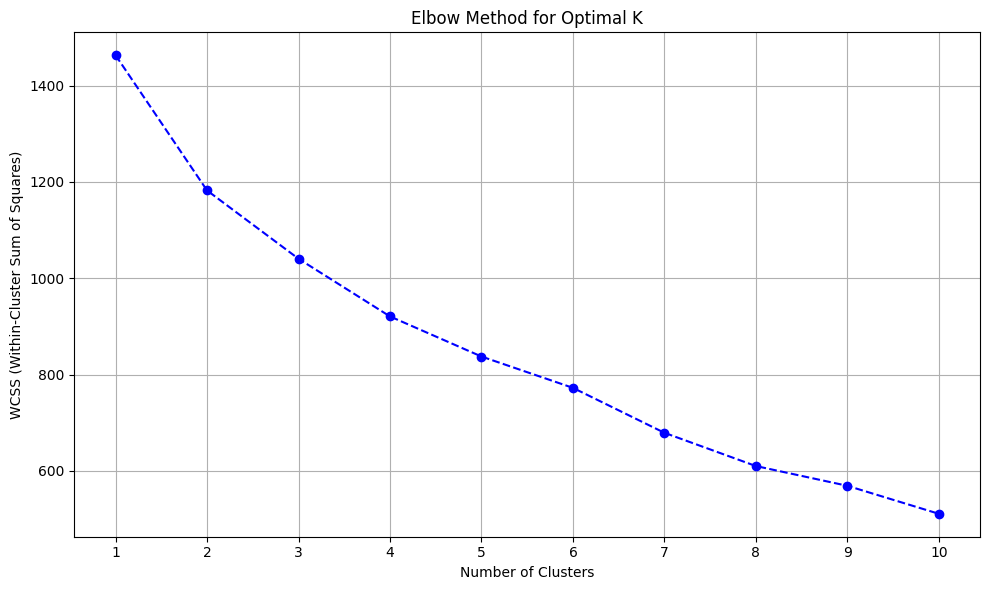

In [219]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, max_clusters + 1))
plt.grid()
plt.tight_layout()
plt.show()

In [220]:
# Fit K-Means with the Optimal Number of Clusters
#replacing optimal value chosen fgrom elboe method
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data['Cluster Labels'] = kmeans.fit_predict(data_scaled)

# Display cluster assignments
print("\nCluster Assignments:")
print(data[['Destination', 'Cluster Labels']].head())



Cluster Assignments:
  Destination  Cluster Labels
0        Rome               2
1    Florence               2
2      Venice               2
3       Milan               1
4      Naples               2


# Visuvalizing  the cluster by uisng pca(principal component analysis)in 2d plot

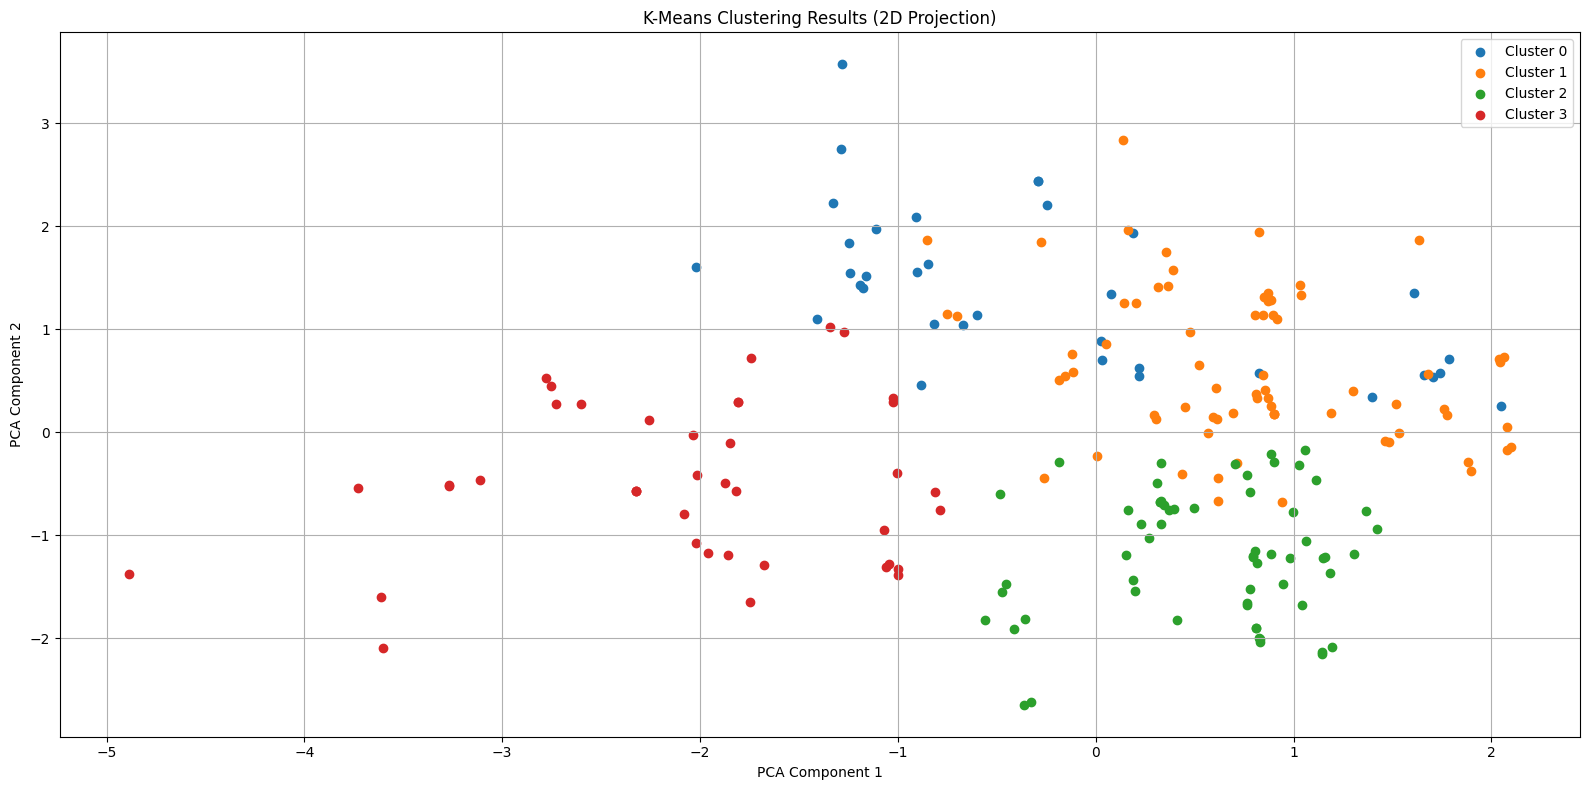

In [221]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)
plt.figure(figsize=(16,8))
for cluster in range(optimal_k):
    cluster_points = reduced_data[data['Cluster Labels'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('K-Means Clustering Results (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# **Hierarchical Clustering Model**

### creating Create a Dendrogram

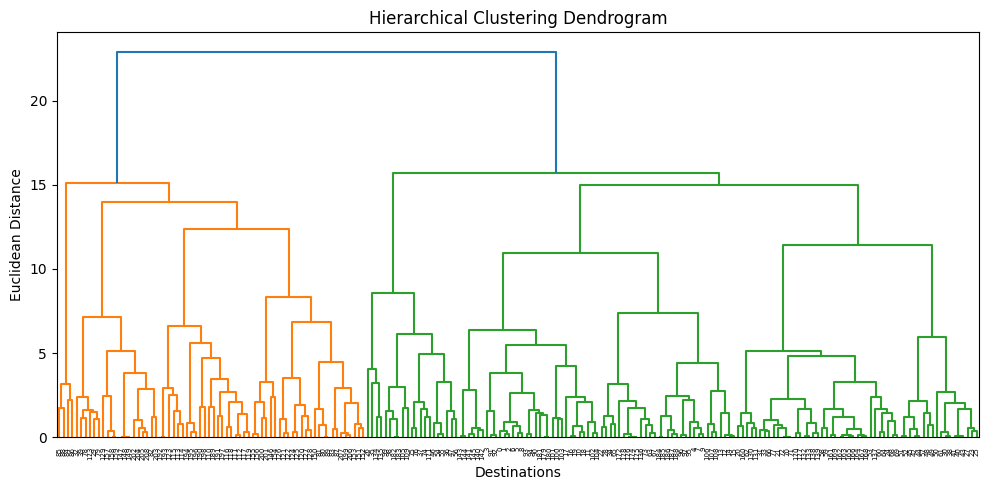

In [226]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
linkage_matrix = linkage(data_scaled, method='ward')
# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Destinations')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()
